In [93]:
import pandas as pd
import numpy as np

In [94]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [95]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) #None으로 설정하면 모든 내용을 출력

In [96]:
# 정규화
import re

In [97]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2024-12-30 14:11:15.030356


'2024-12-30'

In [98]:
df = pd.read_csv(f'news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_갯수,내용_토큰_갯수,제목_명사,내용_명사
0,매일경제,"“국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”","\n 사진 확대 현대제철 CI. [사진 = 현대제철] NH투자증권은 30일 현대제철에 대해 국내 정치 불확실성 심화하고 있지만 내년은 전망이 나아질 것이라며 투자 의견 매수를 유지, 목표주가를 4만원에서 3만2000원으로 하향했다.NH투자증권은 트럼프의 관세 전쟁에 따른 철강 수요 악화 우려 속에 계엄령 발동으로 원달러 환율이 급등해 주가도 약세를 보인다고 봤다. 이에 향후 수익성 회복 폭이 당초 예상보다 낮아질 것으로 예상했다.다만 향후 중국 경기부양에 따른 철강 수요 개선을 기대할 수 있을 것으로 전망했다. 중국 철강의 수요가 개선되면 (중국의) 철강 수출 감소로 이어져 철강의 가격이 상승하는 요인으로 작용할 수 있어서다.현재 중국의 철강 수요에 대한 강한 회복 신호는 나타나고 있지 않지만, 지난 11월 중국 부동산 판매 면적이 2021년 6월 이후 처음으로 전년 동기 대비 3.2% 상승한 것은 주목할 만하다고 봤다.NH투자증권은 국내 건축착공면적이 증가하고 있는 점도 주목할 필요가 있다고 분석했다. 국내 봉형강 수요 개선으로 이어질 수 있어서다. 10월까지 국내 건축착공면적은 전년 동기 대비 12.3% 증가, 올해는 2021년 이후 처음으로 착공면적이 증가할 것으로 봤다. 앞서 국내 철근 및 H형강 수요는 20% 감소했고, 이는 주요 제강사들의 감산으로 이어졌다.이재광 NH투자증권 연구원은 “업황 부진이 지속되면서 원달러 환율까지 급등해 수익에 비우호적으로 작용하는 상황이다”며 “중국 정부의 경기부양책 및 국내 건축착공 면적 증가로 내년은 올해보다 좋을 것으로 보인다”고 밝혔다.\n",2024-12-30 08:29:19,45,795,11,184,국내 정치 원 달러 환율 급등 현대제철 수익 회복 폭 것,사진 확대 현대 제철 사진 현대 제철 투자 증권 제철 대해 국내 정치 불확실 심화 내년 전망 것 라며 투자 의견 매수 유지 목표 주가 하향 투자 증권 트럼프 관세 전쟁 철강 수요 악화 우려 속 계엄령 발동 달러 환율 급등 주가 약세 이 향후 수익 회복 폭 당초 예상 것 예상 다만 향후 중국 기부 철강 수요 개선 수 것 전망 중국 철강 수요 개선 중국 철강 수출 감소 철강 가격 상승 요인 작용 수 현재 중국 철강 수요 대한 회복 신호 지난 중국 부동산 판매 면적 이후 처음 년 동기 대비 상승 것 주목 만 투자 증권 국내 건축 착공 면적 증가 점도 주목 필요 분석 국내 봉 형강 수요 개선 수 국내 건축 착공 면적 년 동기 대비 증가 올해 이후 처음 착공 면적 증가 것 앞서 국내 철근 및 형강 수요 감소 주요 강사 감산 이재 광 투자 증권 연구원 업황 부진 지속 달러 환율 급등 수익 호적 작용 상황 며 중국 정부 경기 부양책 및 국내 건축 착공 면적 증가 내년 올해 것 고


#### CountVectorizer


- 텍스트 데이터 전처리 도구로, 주로 텍스트 데이터를 수치형 데이터로 변환하는 데 사용
- 단어의 빈도를 계산하여 문서-단어 행렬(Document-Term Matrix)을 생성

1. 토큰화(Tokenization):
    - 기본적으로 CountVectorizer는 공백을 기준으로 단어를 나눔
2. 정규 표현식 사용:
    - token_pattern 매개변수를 사용하여 정규 표현식을 정의할 수 있음. 이를 통해 특정 패턴에 맞는 단어만 추출
3. 불용어 제거:
    - stop_words 매개변수를 사용하여 불용어(의미가 없는 단어)를 제거
4. n-그램(n-grams):
    - ngram_range 매개변수를 사용하여 단어의 n-그램을 생성할 수 있음. 예를 들어, ngram_range=(1, 2)로 설정하면 단어와 2-그램(두 단어 조합)을 모두 포함
5. 소문자 변환:
    - 기본적으로 CountVectorizer는 모든 단어를 소문자로 변환하여 대소문자를 구분하지 않음


In [99]:
corpus = df['제목']
corpus

0      “국내 정치 불확실성으로 원달러 환율 급등…현대제철, 수익성 회복 폭 낮아질 것”
1     이지영 서울의대 신경과 교수 “GV1001 PSP 2a 임상 데이터 상당히 고무적”
2                   “이마트, G마켓·알리익스프레스 출자로 사업 시너지 모색”
3            “여행·항공株 어쩌나”…연말 덮친 탄핵·항공 참사에 투자심리 추락 위기
4                        미장에 푹빠진 서학개미, 올해 375조원 사들였다
                           ...                      
95            '오징어 게임 2' 기대감 너무 컸나…아티스트스튜디오 등 관련주 폭락
96                 환율 한때 1486원·코스피 2400 붕괴…꽁꽁 언 투자심리
97                         KODEX 200액티브 순자산 2000억 돌파
98                     꽁꽁 언 투자심리…코스피 거래대금, 연일 최저치 경신
99                       "AI 열풍 이어 받는다"…양자컴 관련주 '들썩'
Name: 제목, Length: 100, dtype: object

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide


#### 매개 변수

- analyzer : 단어, 문자 단위의 벡터화 방법 정의
- ngram_range : BOW 단위 수 (1, 3) 이라면 1개~3개까지 토큰을 묶어서 벡터화
- max_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 높은 용어(말뭉치 관련 불용어)는 제외 (기본값=1.0)
  - max_df = 0.90 : 문서의 90% 이상에 나타나는 단어 제외
  - max_df = 10 : 10개 초과의 문서에 나타나는 단어 제외
- min_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 낮은 용어는 제외합니다. 컷오프라고도 합니다.(기본값=1.0)
  - min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 제외
  - min_df = 10 : 문서에 10개 미만으로 나타나는 단어 제외
- stop_words : 불용어 정의
- max_features : 벡터라이저가 학습할 어휘의 양을 제한, corpus중 빈도가 가장 높은 순으로 해당 개수만큼만 추출


In [102]:
# 공백을 중심으로 토큰화하고, 빈도수 확인
cvect = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2))

#### fit, transform, fit_transfrom의 차이점
- fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 배웁니다.
- transform(): 문서를 문서 용어 매트릭스로 변환합니다. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경됩니다.
- fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환합니다.
fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현됩니다.


In [103]:
X = cvect.fit_transform(corpus)
X

<100x113 sparse matrix of type '<class 'numpy.int64'>'
	with 275 stored elements in Compressed Sparse Row format>

In [104]:
# 단어사전 확인
# 단어사전은 {'단어' : 인덱스번호 }
cvect.vocabulary_

{'국내': 23,
 '환율': 111,
 '급등': 27,
 '현대제철': 110,
 '수익성': 57,
 '사업': 52,
 '시너지': 59,
 '연말': 70,
 '참사에': 95,
 '투자심리': 102,
 '서학개미': 55,
 '올해': 73,
 '테슬라': 100,
 '실스크': 61,
 '한달새': 108,
 '2100': 4,
 '폭등': 105,
 '실스크 한달새': 62,
 '한달새 2100': 109,
 '2100 폭등': 5,
 '내년': 37,
 '4분기': 10,
 '증발': 91,
 '탄핵에': 99,
 '참사까지': 94,
 'k항공': 13,
 '제주항공': 82,
 '비극': 50,
 '반등': 47,
 '기대': 29,
 '올해만': 74,
 '아직': 65,
 '기업': 31,
 '반도체': 46,
 '나홀로': 36,
 '삼성전자': 54,
 '급락': 28,
 '이마트 주가': 79,
 '주가 급락': 87,
 '주가는': 88,
 '기대감': 30,
 '1500원': 0,
 '원화값': 76,
 '무슨': 44,
 '단독': 38,
 '경제': 21,
 '폭락': 106,
 '한국': 107,
 '거래': 20,
 '전망': 81,
 '트럼프': 103,
 '사모시장': 51,
 '투자': 101,
 '알리': 67,
 '지마켓': 93,
 '2기': 8,
 '글로벌': 25,
 '트럼프 2기': 104,
 '2400': 6,
 '코스피 2400': 98,
 '조직개편': 85,
 '실시': 63,
 '강화': 17,
 '조직개편 실시': 86,
 '주식': 89,
 '초고수는': 96,
 '지금': 92,
 '주식 초고수는': 90,
 '초고수는 지금': 97,
 '연금': 69,
 'etf': 12,
 '매수': 41,
 '원자재': 75,
 '산타랠리': 53,
 '2400선': 7,
 '순자산': 58,
 '돌파': 39,
 '관련주': 22,
 '부진': 48,
 '목표가': 42,
 'nh': 14,
 '

In [105]:
X.toarray()

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
cvect.get_feature_names_out()

array(['1500원', '2024', '2025', '2025 재테크', '2100', '2100 폭등', '2400',
       '2400선', '2기', '33', '4분기', '4분기 실적', 'etf', 'k항공', 'nh', '主食이',
       '主食이 주식', '강화', '개미들', '개미들 환호', '거래', '경제', '관련주', '국내', '국장',
       '글로벌', '금융주', '급등', '급락', '기대', '기대감', '기업', '꽁꽁', '꽁꽁 투자심리',
       '나스닥', '나스닥 33', '나홀로', '내년', '단독', '돌파', '마켓pro', '매수', '목표가',
       '목표가 nh', '무슨', '밑돌', '반도체', '반등', '부진', '비결', '비극', '사모시장', '사업',
       '산타랠리', '삼성전자', '서학개미', '수익률', '수익성', '순자산', '시너지', '시총', '실스크',
       '실스크 한달새', '실시', '실적', '아직', '악재', '알리', '알리와', '연금', '연말', '오른다',
       '올들어', '올해', '올해만', '원자재', '원화값', '윤현주의', '윤현주의 主食이', '이마트 주가',
       '재테크', '전망', '제주항공', '조선', '조선 금융주', '조직개편', '조직개편 실시', '주가 급락',
       '주가는', '주식', '주식 초고수는', '증발', '지금', '지마켓', '참사까지', '참사에', '초고수는',
       '초고수는 지금', '코스피 2400', '탄핵에', '테슬라', '투자', '투자심리', '트럼프', '트럼프 2기',
       '폭등', '폭락', '한국', '한달새', '한달새 2100', '현대제철', '환율', '환호'],
      dtype=object)

In [107]:
cvect.get_feature_names_out().size

113

In [108]:
# n번 등장한 단어는 n, 아닌 단어는 0
tmp = pd.DataFrame(X.toarray(), columns = cvect.get_feature_names_out())

In [109]:
tmp.head(2)

,1500원,2024,2025,2025 재테크,2100,2100 폭등,2400,2400선,2기,33,4분기,4분기 실적,etf,k항공,nh,主食이,主食이 주식,강화,개미들,개미들 환호,거래,경제,관련주,국내,국장,글로벌,금융주,급등,급락,기대,기대감,기업,꽁꽁,꽁꽁 투자심리,나스닥,나스닥 33,나홀로,내년,단독,돌파,마켓pro,매수,목표가,목표가 nh,무슨,밑돌,반도체,반등,부진,비결,비극,사모시장,사업,산타랠리,삼성전자,서학개미,수익률,수익성,순자산,시너지,시총,실스크,실스크 한달새,실시,실적,아직,악재,알리,알리와,연금,연말,오른다,올들어,올해,올해만,원자재,원화값,윤현주의,윤현주의 主食이,이마트 주가,재테크,전망,제주항공,조선,조선 금융주,조직개편,조직개편 실시,주가 급락,주가는,주식,주식 초고수는,증발,지금,지마켓,참사까지,참사에,초고수는,초고수는 지금,코스피 2400,탄핵에,테슬라,투자,투자심리,트럼프,트럼프 2기,폭등,폭락,한국,한달새,한달새 2100,현대제철,환율,환호
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
cvect_voca = tmp.sum().sort_values(ascending=False)

급락        5
주식        5
올해        5
한국        5
증발        4
         ..
목표가 nh    2
매수        2
단독        2
내년        2
환호        2
Length: 113, dtype: int64

In [111]:
# 모델을 받아서 변환후 문서-어휘 행렬로 반환하는 함수

def display_transform_dtm(cvect, corpus) : 
    '''
    모델을 받아 변환하고 문서-어휘 행렬을 반환하는 함수
    '''

    X = cvect.fit_transform(corpus)
    print(cvect.get_feature_names_out())
    dtm = X.toarray()
    df_dtm = pd.DataFrame(dtm, columns = cvect.get_feature_names_out()).style.background_gradient()
    return df_dtm


In [112]:
display_transform_dtm(cvect, corpus)

['1500원' '2024' '2025' '2025 재테크' '2100' '2100 폭등' '2400' '2400선' '2기'
 '33' '4분기' '4분기 실적' 'etf' 'k항공' 'nh' '主食이' '主食이 주식' '강화' '개미들' '개미들 환호'
 '거래' '경제' '관련주' '국내' '국장' '글로벌' '금융주' '급등' '급락' '기대' '기대감' '기업' '꽁꽁'
 '꽁꽁 투자심리' '나스닥' '나스닥 33' '나홀로' '내년' '단독' '돌파' '마켓pro' '매수' '목표가' '목표가 nh'
 '무슨' '밑돌' '반도체' '반등' '부진' '비결' '비극' '사모시장' '사업' '산타랠리' '삼성전자' '서학개미'
 '수익률' '수익성' '순자산' '시너지' '시총' '실스크' '실스크 한달새' '실시' '실적' '아직' '악재' '알리'
 '알리와' '연금' '연말' '오른다' '올들어' '올해' '올해만' '원자재' '원화값' '윤현주의' '윤현주의 主食이'
 '이마트 주가' '재테크' '전망' '제주항공' '조선' '조선 금융주' '조직개편' '조직개편 실시' '주가 급락' '주가는'
 '주식' '주식 초고수는' '증발' '지금' '지마켓' '참사까지' '참사에' '초고수는' '초고수는 지금' '코스피 2400'
 '탄핵에' '테슬라' '투자' '투자심리' '트럼프' '트럼프 2기' '폭등' '폭락' '한국' '한달새' '한달새 2100'
 '현대제철' '환율' '환호']


#### TF- IDF(Term Frequency-Inverse Document Frequency)
- TF : 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값. 자주 등장하는 단어는 중요도가 높다고 가정, 문서군에 자주 사용 되는경우 DF라고 함 
- IDF : 특정 단어가 전체 문서 집합에서 얼마나 중요한지를 평가. 자주 등장하는 단어는 중요도가 낮고, 드물게 등장하는 단어는 중요도가 높다고 가정
- TF-IDF : TF와 IDF를 곱한값
- 가중치를 주는개념

#### TfidfVectorizer
- CountVectorizer와 TfidfTransformer를 합쳐놓은 것
- 문서 모음을 TF-IDF 매트릭스로 변환
- 

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
# cvect = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2))

tfidfvect = TfidfVectorizer(max_df=5,min_df=2, ngram_range=(1,2))
X = tfidfvect.fit(corpus).transform(corpus)  # tfidfvect.fit_transform(corpus)와 동일
X

<100x113 sparse matrix of type '<class 'numpy.float64'>'
	with 275 stored elements in Compressed Sparse Row format>

In [117]:
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커진다 TF
# 그러나 토큰이 여러문서에 많이 표시될수록 가중치는 감소 IDF
dtm = X.toarray()
dtm

array([[0.        , 0.        , 0.        , ..., 0.47405386, 0.42043748,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [118]:
display_transform_dtm(tfidfvect, corpus)

['1500원' '2024' '2025' '2025 재테크' '2100' '2100 폭등' '2400' '2400선' '2기'
 '33' '4분기' '4분기 실적' 'etf' 'k항공' 'nh' '主食이' '主食이 주식' '강화' '개미들' '개미들 환호'
 '거래' '경제' '관련주' '국내' '국장' '글로벌' '금융주' '급등' '급락' '기대' '기대감' '기업' '꽁꽁'
 '꽁꽁 투자심리' '나스닥' '나스닥 33' '나홀로' '내년' '단독' '돌파' '마켓pro' '매수' '목표가' '목표가 nh'
 '무슨' '밑돌' '반도체' '반등' '부진' '비결' '비극' '사모시장' '사업' '산타랠리' '삼성전자' '서학개미'
 '수익률' '수익성' '순자산' '시너지' '시총' '실스크' '실스크 한달새' '실시' '실적' '아직' '악재' '알리'
 '알리와' '연금' '연말' '오른다' '올들어' '올해' '올해만' '원자재' '원화값' '윤현주의' '윤현주의 主食이'
 '이마트 주가' '재테크' '전망' '제주항공' '조선' '조선 금융주' '조직개편' '조직개편 실시' '주가 급락' '주가는'
 '주식' '주식 초고수는' '증발' '지금' '지마켓' '참사까지' '참사에' '초고수는' '초고수는 지금' '코스피 2400'
 '탄핵에' '테슬라' '투자' '투자심리' '트럼프' '트럼프 2기' '폭등' '폭락' '한국' '한달새' '한달새 2100'
 '현대제철' '환율' '환호']


In [119]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

ValueError: Shape of passed values is (100, 113), indices imply (100, 1235)

In [128]:
tfidvect_voca = tmp.sum().sort_values(ascending=False)

In [121]:
print(tfidfvect.idf_.shape)
print(tfidfvect.idf_)

(113,)
[4.22882616 4.51650823 4.22882616 4.51650823 4.51650823 4.51650823
 4.51650823 4.51650823 4.51650823 4.51650823 4.22882616 4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.51650823 4.51650823 4.51650823 4.22882616 4.22882616 4.22882616
 4.51650823 4.22882616 4.51650823 4.0056826  3.82336105 4.22882616
 4.51650823 4.51650823 4.51650823 4.51650823 4.22882616 4.51650823
 4.51650823 4.51650823 4.51650823 4.22882616 4.0056826  4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.22882616 4.51650823 4.51650823 4.51650823 4.51650823 4.0056826
 4.51650823 4.51650823 4.51650823 4.51650823 4.22882616 4.51650823
 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823 4.51650823
 4.51650823 3.82336105 4.51650823 4.51650823 4.51650823 4.51650823
 4.51650823 4.22882616 4.51650823 4.22882616 4.0056826  4.51650823
 4.51650823 4.51650823 4.51650823 4.22882616 4.22882616 

In [122]:
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab, tfidfvect.idf_))
idf_dict

TypeError: 'dict' object is not callable

In [ ]:
pd.Series(idf_dict).nsmallest(30).to_frame().style.background_gradient()

In [ ]:
pd.Series(idf_dict).nlargest(30).to_frame().style.background_gradient()

In [ ]:
pd.Series(idf_dict).nsmallest(30).to_frame().plot.barh()

In [ ]:
cvect_voca = tmp.sum().sort_values(ascending=False)

In [123]:
# CounterVectorizer로 분석한 수치
cvect_voca.to_dict()

{'급락': 5,
 '주식': 5,
 '올해': 5,
 '한국': 5,
 '증발': 4,
 '제주항공': 4,
 '테슬라': 4,
 '마켓pro': 4,
 '트럼프': 4,
 '급등': 4,
 '한달새': 4,
 '환율': 4,
 '시너지': 4,
 '전망': 3,
 '부진': 3,
 '글로벌': 3,
 '이마트 주가': 3,
 '돌파': 3,
 '삼성전자': 3,
 '주가 급락': 3,
 '주가는': 3,
 '나스닥': 3,
 '기대': 3,
 '목표가': 3,
 '1500원': 3,
 '실적': 3,
 '투자': 3,
 '국내': 3,
 '관련주': 3,
 '경제': 3,
 '4분기': 3,
 '2025': 3,
 'etf': 3,
 '투자심리': 3,
 '윤현주의': 2,
 '원화값': 2,
 '원자재': 2,
 '한달새 2100': 2,
 '올들어': 2,
 '올해만': 2,
 '현대제철': 2,
 '폭락': 2,
 '오른다': 2,
 '연말': 2,
 '연금': 2,
 '알리와': 2,
 '알리': 2,
 '윤현주의 主食이': 2,
 '참사에': 2,
 '폭등': 2,
 '재테크': 2,
 '참사까지': 2,
 '조선': 2,
 '조선 금융주': 2,
 '조직개편': 2,
 '조직개편 실시': 2,
 '탄핵에': 2,
 '코스피 2400': 2,
 '초고수는 지금': 2,
 '초고수는': 2,
 '주식 초고수는': 2,
 '악재': 2,
 '지금': 2,
 '지마켓': 2,
 '트럼프 2기': 2,
 '수익률': 2,
 '아직': 2,
 '主食이': 2,
 '기업': 2,
 '기대감': 2,
 '금융주': 2,
 '국장': 2,
 '거래': 2,
 '개미들 환호': 2,
 '개미들': 2,
 '강화': 2,
 '主食이 주식': 2,
 'nh': 2,
 '꽁꽁 투자심리': 2,
 'k항공': 2,
 '4분기 실적': 2,
 '33': 2,
 '2기': 2,
 '2400선': 2,
 '2400': 2,
 '2100 폭등': 2,
 '2100': 2,
 '

In [124]:
#tfidfvectorizer로 분석한 어휘 중요도 내림차순
tfidvect_voca.to_dict()

{'급락': 5,
 '주식': 5,
 '올해': 5,
 '한국': 5,
 '증발': 4,
 '제주항공': 4,
 '테슬라': 4,
 '마켓pro': 4,
 '트럼프': 4,
 '급등': 4,
 '한달새': 4,
 '환율': 4,
 '시너지': 4,
 '전망': 3,
 '부진': 3,
 '글로벌': 3,
 '이마트 주가': 3,
 '돌파': 3,
 '삼성전자': 3,
 '주가 급락': 3,
 '주가는': 3,
 '나스닥': 3,
 '기대': 3,
 '목표가': 3,
 '1500원': 3,
 '실적': 3,
 '투자': 3,
 '국내': 3,
 '관련주': 3,
 '경제': 3,
 '4분기': 3,
 '2025': 3,
 'etf': 3,
 '투자심리': 3,
 '윤현주의': 2,
 '원화값': 2,
 '원자재': 2,
 '한달새 2100': 2,
 '올들어': 2,
 '올해만': 2,
 '현대제철': 2,
 '폭락': 2,
 '오른다': 2,
 '연말': 2,
 '연금': 2,
 '알리와': 2,
 '알리': 2,
 '윤현주의 主食이': 2,
 '참사에': 2,
 '폭등': 2,
 '재테크': 2,
 '참사까지': 2,
 '조선': 2,
 '조선 금융주': 2,
 '조직개편': 2,
 '조직개편 실시': 2,
 '탄핵에': 2,
 '코스피 2400': 2,
 '초고수는 지금': 2,
 '초고수는': 2,
 '주식 초고수는': 2,
 '악재': 2,
 '지금': 2,
 '지마켓': 2,
 '트럼프 2기': 2,
 '수익률': 2,
 '아직': 2,
 '主食이': 2,
 '기업': 2,
 '기대감': 2,
 '금융주': 2,
 '국장': 2,
 '거래': 2,
 '개미들 환호': 2,
 '개미들': 2,
 '강화': 2,
 '主食이 주식': 2,
 'nh': 2,
 '꽁꽁 투자심리': 2,
 'k항공': 2,
 '4분기 실적': 2,
 '33': 2,
 '2기': 2,
 '2400선': 2,
 '2400': 2,
 '2100 폭등': 2,
 '2100': 2,
 '

In [125]:
def display_word_cloud(dict, max_words=30, width=1200,height=600) : 

    # r스트링 쓰는이유 : \ 를 특별한 의미로 해석하지말고 평범한 하나의 문자로 해석하게 하기위함
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','증시','한국']
    word_cloud = WordCloud(font_path = font_path,
              width=width,
              height=height,
              stopwords=stopwords,
              background_color='white',
              min_word_length = 2,
              max_words = max_words,
              random_state=2024).generate_from_frequencies(dict)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

{'급락': 5, '주식': 5, '올해': 5, '한국': 5, '증발': 4, '제주항공': 4, '테슬라': 4, '마켓pro': 4, '트럼프': 4, '급등': 4, '한달새': 4, '환율': 4, '시너지': 4, '전망': 3, '부진': 3, '글로벌': 3, '이마트 주가': 3, '돌파': 3, '삼성전자': 3, '주가 급락': 3, '주가는': 3, '나스닥': 3, '기대': 3, '목표가': 3, '1500원': 3, '실적': 3, '투자': 3, '국내': 3, '관련주': 3, '경제': 3, '4분기': 3, '2025': 3, 'etf': 3, '투자심리': 3, '윤현주의': 2, '원화값': 2, '원자재': 2, '한달새 2100': 2, '올들어': 2, '올해만': 2, '현대제철': 2, '폭락': 2, '오른다': 2, '연말': 2, '연금': 2, '알리와': 2, '알리': 2, '윤현주의 主食이': 2, '참사에': 2, '폭등': 2, '재테크': 2, '참사까지': 2, '조선': 2, '조선 금융주': 2, '조직개편': 2, '조직개편 실시': 2, '탄핵에': 2, '코스피 2400': 2, '초고수는 지금': 2, '초고수는': 2, '주식 초고수는': 2, '악재': 2, '지금': 2, '지마켓': 2, '트럼프 2기': 2, '수익률': 2, '아직': 2, '主食이': 2, '기업': 2, '기대감': 2, '금융주': 2, '국장': 2, '거래': 2, '개미들 환호': 2, '개미들': 2, '강화': 2, '主食이 주식': 2, 'nh': 2, '꽁꽁 투자심리': 2, 'k항공': 2, '4분기 실적': 2, '33': 2, '2기': 2, '2400선': 2, '2400': 2, '2100 폭등': 2, '2100': 2, '2025 재테크': 2, '꽁꽁': 2, '나스닥 33': 2, '실시': 2, '사모시장': 2, '실스크 한달새': 2, '실스크': 2, '시총': 2

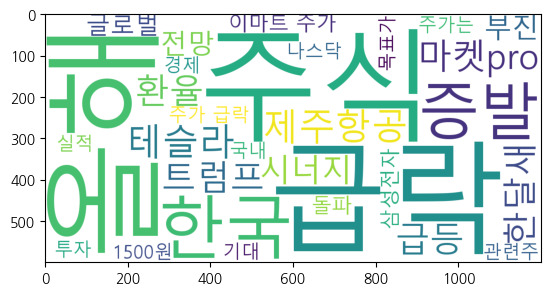

In [126]:
dict = cvect_voca.to_dict()
print(dict)
display_word_cloud(dict)

{'급락': 5, '주식': 5, '올해': 5, '한국': 5, '증발': 4, '제주항공': 4, '테슬라': 4, '마켓pro': 4, '트럼프': 4, '급등': 4, '한달새': 4, '환율': 4, '시너지': 4, '전망': 3, '부진': 3, '글로벌': 3, '이마트 주가': 3, '돌파': 3, '삼성전자': 3, '주가 급락': 3, '주가는': 3, '나스닥': 3, '기대': 3, '목표가': 3, '1500원': 3, '실적': 3, '투자': 3, '국내': 3, '관련주': 3, '경제': 3, '4분기': 3, '2025': 3, 'etf': 3, '투자심리': 3, '윤현주의': 2, '원화값': 2, '원자재': 2, '한달새 2100': 2, '올들어': 2, '올해만': 2, '현대제철': 2, '폭락': 2, '오른다': 2, '연말': 2, '연금': 2, '알리와': 2, '알리': 2, '윤현주의 主食이': 2, '참사에': 2, '폭등': 2, '재테크': 2, '참사까지': 2, '조선': 2, '조선 금융주': 2, '조직개편': 2, '조직개편 실시': 2, '탄핵에': 2, '코스피 2400': 2, '초고수는 지금': 2, '초고수는': 2, '주식 초고수는': 2, '악재': 2, '지금': 2, '지마켓': 2, '트럼프 2기': 2, '수익률': 2, '아직': 2, '主食이': 2, '기업': 2, '기대감': 2, '금융주': 2, '국장': 2, '거래': 2, '개미들 환호': 2, '개미들': 2, '강화': 2, '主食이 주식': 2, 'nh': 2, '꽁꽁 투자심리': 2, 'k항공': 2, '4분기 실적': 2, '33': 2, '2기': 2, '2400선': 2, '2400': 2, '2100 폭등': 2, '2100': 2, '2025 재테크': 2, '꽁꽁': 2, '나스닥 33': 2, '실시': 2, '사모시장': 2, '실스크 한달새': 2, '실스크': 2, '시총': 2

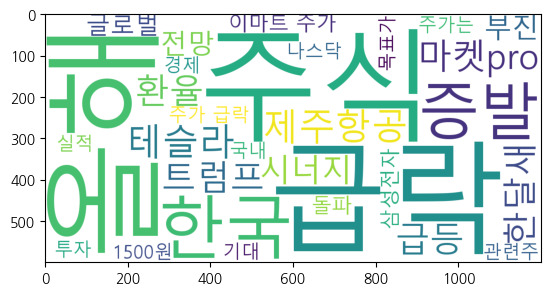

In [129]:
dict = tfidvect_voca.to_dict()
print(dict)
display_word_cloud(dict)

In [ ]:
tfidfvect = TfidfVectorizer(ngram_range=(3,4), max_df = 0.9, min_df = 1)
display_transform_dtm(tfidfvect, corpus)

#### 문제
- 금일 증권 뉴스를 수집하여 CountVectorizer(빈도), TfidfVectorizer(중요도)를 사용하여 상위 키워드 30개를 각각 워드 클라우드로 시각화해서 비교해보기

- WordCloud().generate_from_frequencies({어휘:값})

- 고려사항 : 전처리(형태소추출, 불용어처리 등)

In [37]:
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,‘오징어게임2’ 외신 혹평에...테마주 동반 폭락,"\n 사진 확대 ‘오징어 게임2’. 제공|넷플릭스 전 세계적 기대작 넷플릭스 ‘오징어 게임2’가 공개된 다음 날인 27일 장 초반 관련 종목들이 급락하고 있다.이날 오전 9시 20분 현재 아티스트스튜디오(200350)가 26.68% 급락 중이며, 아티스트유나이티드(321820)도 23.98% 하락하고 있다.아티스트스튜디오와 아티스트유나이티드는 시즌1에 이어 ‘오징어게임2’에서도 주연을 맡은 배우 이정재가 대주주로 있는 기업이다.또 ‘오징어게임2’의 영상 특수효과를 맡은 위지윅스튜디오(299900)는 20.00% 하락했고, 덱스터(206560)는 18.59% 내려 거래되고 있다.‘오징어게임’ 제작사인 싸이런픽쳐스에 투자한 쇼박스(086980)도 14.97% 급락을 면치 못하고 있다.지난 2021년 9월 공개돼 전 세계적으로 폭발적인 인기를 얻었던 ‘오징어 게임’의 후속작인 ‘오징어 게임2’는 지난 26일 오후 5시(한국시간) 넷플릭스를 통해 공개됐다.큰 기대 속에 베일을 벗은 ‘오징어게임2’에 대해 해외 주요 매체들은 “이야기가 정체돼있다’”, “날카로움을 잃었다”, “재미도 기발함도 없다”는 등 첫 시즌에 비해 실망스럽다는 반응을 보이고 있다.국내 시청자들도 대체로 시즌1만 못하다는 반응을 보이고 있으며 특히 그룹 빅뱅 출신 탑(최승현)의 오글거리는 연기에 혹평을 보내고 있다.시즌2에 이어지는 ‘오징어게임3’가 내년에 공개된다.\n",2024-12-27 09:38:05


In [ ]:
def display_word_cloud(str, max_words=30, width=1200,height=600) : 

    # r스트링 쓰는이유 : \ 를 특별한 의미로 해석하지말고 평범한 하나의 문자로 해석하게 하기위함
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','올해','내년','상장','시총','상승','하락','국내','해외','외국인','투자','서학','동학','소식에','기대감','기업','시장','목표가']
    word_cloud = WordCloud(font_path = font_path,
              width=width,
              height=height,
              stopwords=stopwords,
              background_color='white',
              min_word_length = 2,
              max_words = max_words,
              random_state=2024).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

In [ ]:
corpus_content = df['내용']
corpus_content

In [95]:
# 공백을 중심으로 토큰화하고, 빈도수 확인
stop_words = ['fi'] 
cvect_content = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2),stop_words=stop_words)

In [96]:
cvect_content

CountVectorizer(max_df=5, min_df=2, ngram_range=(1, 2), stop_words=['fi'])

In [97]:
X_content = cvect_content.fit_transform(corpus_content)

In [ ]:
cvect_content.vocabulary_

In [43]:
 cvect_content_list = cvect_content.get_feature_names_out()

In [108]:
# 모델을 받아서 변환후 문서-어휘 행렬로 반환하는 함수

def display_transform_dtm(cvect, corpus) : 
    '''
    모델을 받아 변환하고 문서-어휘 행렬을 반환하는 함수
    '''

    X = cvect.fit_transform(corpus)
    print(cvect.get_feature_names_out())  # 어휘사전 출력
    dtm = X.toarray()
    df_dtm = pd.DataFrame(dtm, columns = cvect.get_feature_names_out())
    return df_dtm

In [99]:
df_dtm_content = display_transform_dtm(cvect_content, corpus_content)

['01' '01 3조4400억원에' '02' ... '힘을' '힘입어 12월' '힘입어 24일']


In [100]:
type(df_dtm_content)

pandas.core.frame.DataFrame

In [101]:
dtm_top_30_dict = dict(df_dtm_content.sum().sort_values(ascending=False).head(30))

In [102]:
dtm_top_30_dict

{'외국인': 25,
 '11번가': 21,
 '전기차': 20,
 '고려아연': 17,
 'mk시그널': 16,
 '상장한': 15,
 '기아': 13,
 '신세계그룹': 12,
 '오징어': 12,
 '환율이': 12,
 '전자상거래': 12,
 '인도': 12,
 '종가': 11,
 '전기차 충전기': 11,
 '원화값이': 11,
 '온라인': 11,
 '충전기': 11,
 '토스증권': 11,
 '선박': 11,
 '부동산': 11,
 '신세계': 10,
 '성장': 10,
 '유지': 10,
 '방안을': 10,
 '달러당': 10,
 '기업에': 10,
 '경영권': 10,
 '순매수했다': 10,
 '세제': 10,
 '해양': 10}

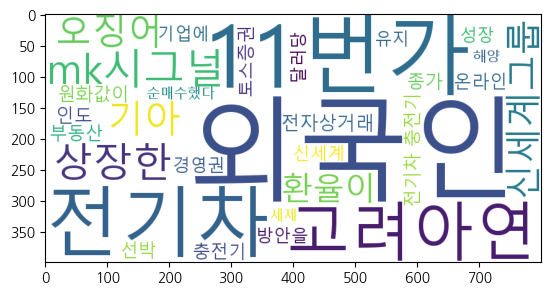

In [103]:
word_cloud = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                       width=800,
                       height=400,
                       background_color='white',
                       min_word_length = 2,
                       random_state=2024)
word_cloud.generate_from_frequencies(dtm_top_30_dict)
plt.imshow(word_cloud)
plt.show()

In [72]:
from konlpy.tag import Okt
okt = Okt()

In [73]:
from tqdm import tqdm
tqdm.pandas()

In [74]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:07<00:00, 12.99it/s]


In [ ]:
corpus_content_nouns = df['내용_명사']
corpus_content_nouns

In [76]:
cvect_content_nouns = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2))

In [78]:
X_content_nouns = cvect_content_nouns.fit_transform(corpus_content_nouns)
X_content_nouns

<100x3123 sparse matrix of type '<class 'numpy.int64'>'
	with 7896 stored elements in Compressed Sparse Row format>

In [79]:
df_dtm_content_nouns = display_transform_dtm(cvect_content_nouns, corpus_content_nouns)

['가격 경쟁' '가격 경쟁력' '가격 교란' ... '흐름 전망' '흑자' '흥행']


In [ ]:
df_dtm_content_nouns

In [81]:
dtm_nouns_top_30_dict = dict(df_dtm_content_nouns.sum().sort_values(ascending=False).head(30))

In [83]:
dtm_nouns_top_30_dict

{'아티스트': 29,
 '시그널': 28,
 '번가': 28,
 '오징어': 27,
 '오징어 게임': 27,
 '고려아연': 25,
 '외국인 투자자': 25,
 '전기차': 24,
 '세제': 23,
 '아티스트 유나이티드': 18,
 '현대차 기아': 18,
 '스퀘어': 18,
 '유나이티드': 18,
 '매각': 17,
 '커뮤니티': 17,
 '인도': 16,
 '시즌': 16,
 '간담': 15,
 '통운': 15,
 '세제 지원': 15,
 '휴맥스': 15,
 '신규 상장': 15,
 '메모리': 15,
 '부동산': 14,
 '투자자 매수': 14,
 '부채': 14,
 '위원장': 14,
 '확산': 14,
 '토스': 14,
 '감사': 14}

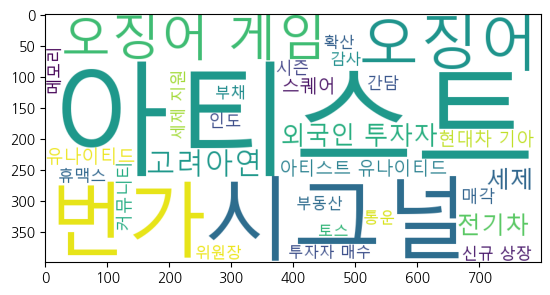

In [82]:
# 오늘자 기사 
word_cloud = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                       width=800,
                       height=400,
                       background_color='white',
                       min_word_length = 2,
                       random_state=2024)
word_cloud.generate_from_frequencies(dtm_nouns_top_30_dict)
plt.imshow(word_cloud)
plt.show()

In [104]:
tfidfvect = TfidfVectorizer()
X_tfidf_content = tfidfvect.fit_transform(corpus_content)

In [105]:
dtm_tfidf_content = X_tfidf_content.toarray()

In [110]:
df_dtm_tfidf_content= display_transform_dtm(tfidfvect, corpus_content)

['00' '000원' '000원에' ... '힘쓰고' '힘을' '힘입어']


In [ ]:
df_dtm_tfidf_content

In [112]:
df_dtm_tfidf_content_top_30_dict = dict(df_dtm_tfidf_content.sum().sort_values(ascending=False).head(30))

In [114]:
df_dtm_tfidf_content_top_30_dict

{'있다': 4.158274574444082,
 '것으로': 2.4694590321964047,
 '대비': 2.147463507193408,
 '밸류업': 2.068703496241403,
 '국내': 2.014401789016581,
 '사진': 1.982455991044553,
 '지난': 1.892754548179447,
 '통해': 1.8037285786674218,
 '내년': 1.7341871038653665,
 '올해': 1.7146976372076321,
 '미국': 1.7034153120943074,
 '26일': 1.676623496833461,
 '확대': 1.6530927339972448,
 '기업': 1.6044398385802914,
 '이후': 1.5837060847455218,
 '글로벌': 1.5400772388880077,
 '이라고': 1.5172714180666556,
 '기자': 1.5128727399459487,
 '연구원은': 1.4921992232396906,
 '했다': 1.4389437694042173,
 '코스닥': 1.4288699535585456,
 '있는': 1.4090509426096978,
 '이날': 1.4006328332771305,
 '오른': 1.368852651845429,
 '투자': 1.3660957322883882,
 'com': 1.3413455616044414,
 'hankyung': 1.3413455616044414,
 '기준': 1.3262273090350576,
 '현재': 1.2965344041479412,
 '주가가': 1.2657595104824921}

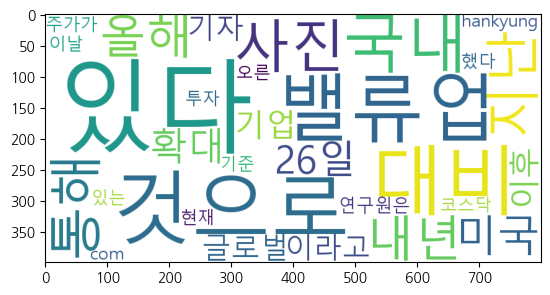

In [113]:
word_cloud = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                       width=800,
                       height=400,
                       background_color='white',
                       min_word_length = 2,
                       random_state=2024)
word_cloud.generate_from_frequencies(df_dtm_tfidf_content_top_30_dict)
plt.imshow(word_cloud)
plt.show()

In [ ]:
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab, tfidfvect.idf_))
idf_dict

In [107]:
idf_dict.head(30)

AttributeError: 'dict' object has no attribute 'head'